<a href="https://colab.research.google.com/github/D1scoDancer/Bankruptcy-DA-Project/blob/main/Notebooks/bankruptcy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install ucimlrepo
!pip install seaborn scikit-learn

# Импорты

In [38]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка данных

### Получение данных

In [16]:
# fetch taiwanese dataset
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572)

# data (as pandas dataframes)
taiwanese_X = taiwanese_bankruptcy_prediction.data.features
taiwanese_y = taiwanese_bankruptcy_prediction.data.targets

In [17]:
taiwanese_X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [18]:
taiwanese_y

,Bankrupt?
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


In [19]:
# fetch polish dataset
polish_companies_bankruptcy = fetch_ucirepo(id=365)

# data (as pandas dataframes)
polish_X = polish_companies_bankruptcy.data.features
polish_y = polish_companies_bankruptcy.data.targets

In [20]:
polish_X

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,...,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
1,1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,...,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700
2,1,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,...,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780
3,1,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,...,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970
4,1,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,...,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,5,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,...,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990
43401,5,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,...,-9242.10,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050
43402,5,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,...,-58253.00,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270
43403,5,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,...,1107.50,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575


In [21]:
polish_y

,class
0,0
1,0
2,0
3,0
4,0
...,...
43400,1
43401,1
43402,1
43403,1


### Переименование колонок

In [22]:
# Список новых названий столбцов
new_column_names = [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold)",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets"
]

# Добавление колонки "year" к новым названиям столбцов
all_columns = ["year"] + new_column_names

# Переименование столбцов, включая сохранение "year"
polish_X.columns = all_columns

# Проверка результата
polish_X

,year,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets
0,1,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,...,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
1,1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,...,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700
2,1,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,...,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780
3,1,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,...,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970
4,1,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,...,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,5,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,...,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990
43401,5,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,...,-9242.10,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050
43402,5,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,...,-58253.00,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270
43403,5,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,...,1107.50,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575


# Анализ данных

## Тайвань

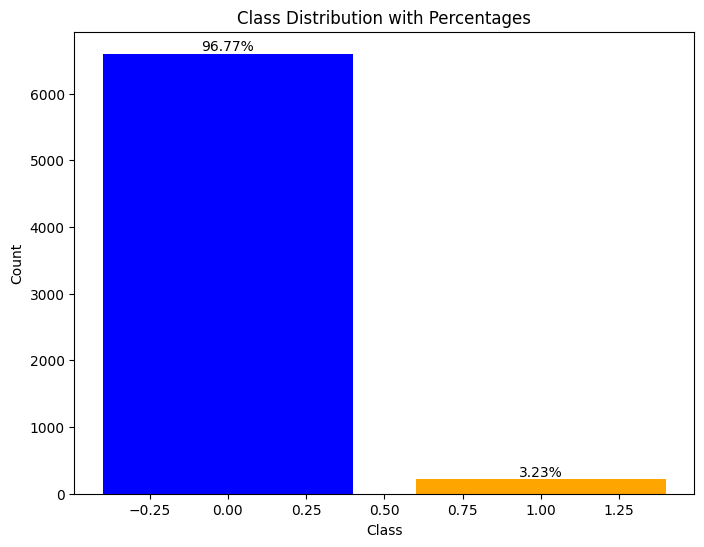

In [36]:
# Calculate the percentage distribution
class_counts = taiwanese_y['Bankrupt?'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color=['blue', 'orange'])

for bar, percentage in zip(bars, class_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution with Percentages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Польша

#### X

In [23]:
columns_to_keep = [
    'year',
    'net profit / total assets',
    'total liabilities / total assets',
    'current assets / short-term liabilities',
    'retained earnings / total assets',
    'EBIT / total assets',
    'book value of equity / total liabilities',
    'sales / total assets',
    'equity / total assets'
]
polish_X_sub = polish_X[columns_to_keep]

In [25]:
polish_X_sub

,year,net profit / total assets,total liabilities / total assets,current assets / short-term liabilities,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets
0,1,0.200550,0.37951,2.04720,0.38825,0.249760,1.33050,1.13890,0.504940
1,1,0.209120,0.49988,1.94470,0.00000,0.258340,0.99601,1.69960,0.497880
2,1,0.248660,0.69592,1.55480,0.00000,0.309060,0.43695,1.30900,0.304080
3,1,0.081483,0.30734,2.49280,0.14988,0.092704,1.86610,1.05710,0.573530
4,1,0.187320,0.61323,1.40630,0.18732,0.187320,0.63070,1.15590,0.386770
...,...,...,...,...,...,...,...,...,...
43400,5,0.012898,0.70621,1.17220,0.00000,0.013981,0.41600,1.67680,0.293790
43401,5,-0.578050,0.96702,0.16576,-0.57805,-0.578050,-0.40334,0.93979,-0.390040
43402,5,-0.179050,1.25530,0.74554,-0.17905,-0.154930,-0.26018,1.17490,-0.326590
43403,5,-0.108860,0.74394,1.08780,-0.10886,-0.109180,0.12531,0.84516,0.093224


##### Correlation

Text(0.5, 1.0, 'Correlation')

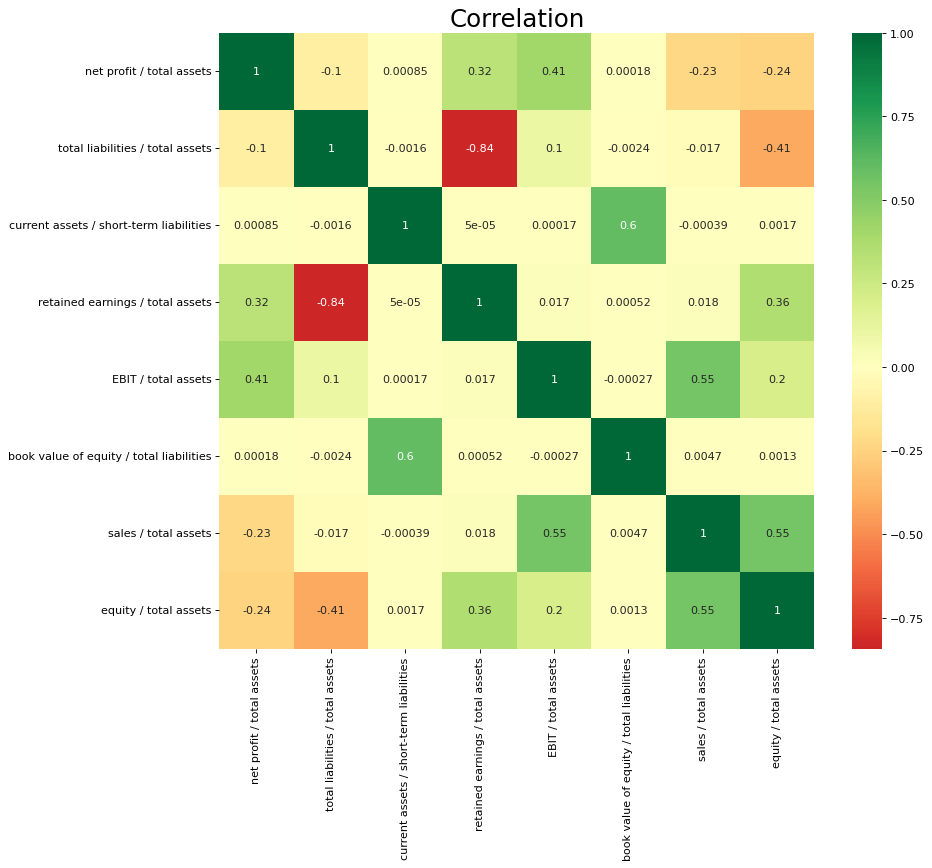

In [41]:
plt.figure(figsize=(12,10), dpi = 80)
sns.heatmap(polish_X_sub[['net profit / total assets',
    'total liabilities / total assets',
    'current assets / short-term liabilities',
    'retained earnings / total assets',
    'EBIT / total assets',
    'book value of equity / total liabilities',
    'sales / total assets',
    'equity / total assets']].corr(), cmap = "RdYlGn", center = 0, annot = True
            )
plt.title('Correlation', fontsize=22)

##### PairPlot

In [ ]:
sns.pairplot(polish_X_sub[['net profit / total assets',
    'total liabilities / total assets',
    'current assets / short-term liabilities',
    'retained earnings / total assets',
    'EBIT / total assets',
    'book value of equity / total liabilities',
    'sales / total assets',
    'equity / total assets']])
plt.suptitle('Pairplot of Selected Variables', y=polish_y)
plt.show()

##### Nulls

In [49]:
print(polish_X_sub.isnull().sum())
print(polish_X_sub.shape[0])

year                                          0
net profit / total assets                     8
total liabilities / total assets              8
current assets / short-term liabilities     133
retained earnings / total assets              8
EBIT / total assets                           8
book value of equity / total liabilities     93
sales / total assets                          9
equity / total assets                         8
dtype: int64
42779


In [48]:
polish_X_sub = polish_X_sub.drop_duplicates()

#### y

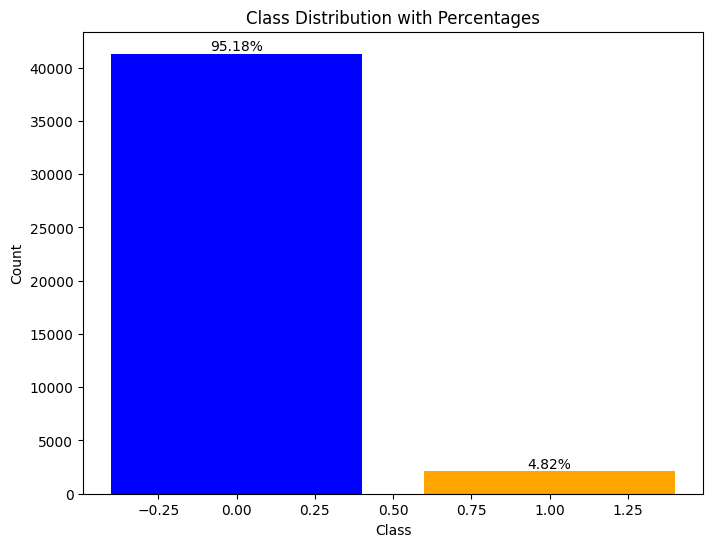

In [33]:
# Calculate the percentage distribution
class_counts = polish_y['class'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts, color=['blue', 'orange'])

for bar, percentage in zip(bars, class_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Class Distribution with Percentages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Сравнительный анализ данных

# Построение моделей

Использовать SMOTE?

### Модель Альтмана (Z-score)

## Логистическая регрессия

## Дискриминантный анализ

## Наша модель